## Εργασία 4η Όραση Υπολογιστών

<a href="https://cognitiveclass.ai"><img src = "https://miro.medium.com/max/1838/1*xFWFKr_v0gOUkXyAg28Aew.png" width = 500> </a>

### Υλοποίηση Αρχιτεκτονικών Δικτύων 
##### Μαρία Αρετή Γερμανού - 57807 - 7ο Εξάμηνο

---



#### My architectural model:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/Colab Notebooks/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Directories from all our training and validation pictures.

train_dir = 'imagedb'
validation_dir = 'imagedb_test'

train_directories = os.listdir(train_dir)
val_directories = os.listdir(validation_dir)

train_imagedb_dir_ls = []
validation_imagedb_dir_ls = []

for i in range(len(train_directories)):
  train_imagedb_dir_ls.append(train_directories[i])

for i in range(len(val_directories)):
  validation_imagedb_dir_ls.append(val_directories[i])

#print(train_imagedb_dir_ls)
#print(train_imagedb_dir_ls)

In [5]:
# Choosing one of the directories in our lists. For example the first element.

temp_train_dir = os.path.join(train_dir, train_imagedb_dir_ls[0])
temp_val_dir = os.path.join(validation_dir, validation_imagedb_dir_ls[0])

train_imagedb_fnames = os.listdir(temp_train_dir)
val_imagedb_fnames = os.listdir(temp_val_dir)

print(train_imagedb_fnames[:10])
print(val_imagedb_fnames[:10])

['00909_00000.ppm', '01541_00001.ppm', '00376_00000.ppm', '01365_00001.ppm', '01657_00002.ppm', '01541_00002.ppm', '01693_00002.ppm', '01496_00000.ppm', '00413_00002.ppm', '01365_00000.ppm']
['02081_00001.ppm', '02081_00002.ppm', '02059_00001.ppm', '02140_00001.ppm', '00040_00001.ppm', '00040_00003.ppm', '00117_00000.ppm', '02059_00002.ppm', '02102_00002.ppm', '02140_00002.ppm']


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x2 configuration
nrows = 2
ncols = 4

pic_index = 0 # Index for iterating over images

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_pix = [os.path.join(temp_train_dir, fname) 
                for fname in train_imagedb_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='gray')


In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau
from keras import callbacks

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="same"),
  tf.keras.layers.BatchNormalization(),


  tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.25),

  tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu',  padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Dropout(rate=0.5),
 

  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.25),

  tf.keras.layers.Flatten(),
 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.5),

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.5),

  tf.keras.layers.Dense(34, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       7

#### Data Augmentation:

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    
rescale = 1./255,
rotation_range = 30,
zoom_range = 0.15,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.15,
horizontal_flip = True,
fill_mode = "nearest")
       
val_datagen  = ImageDataGenerator(rescale = 1./255,)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 64,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    target_size = (28,28))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 64,
                                                         class_mode = 'categorical',
                                                         color_mode = 'grayscale',
                                                         target_size = (28,28)) 

Found 3056 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [11]:
# Compile the model.

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#### Callbacks:

In [12]:
# Train the model

import datetime

#call = callbacks.ModelCheckpoint(f'best_weights.hdf5', monitor = 'val_loss', mode = 'min', verbose = 1, save_best_only = True)
#early = callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 1, mode = 'auto')


callbacks = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only = True, verbose = 1)
callbacks.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True, verbose = 1)
callbacks.append(early_stop_callback)

In [ ]:
# Train the model

history = model.fit(
train_generator,
validation_data = validation_generator,
steps_per_epoch = train_generator.samples/train_generator.batch_size,
validation_steps = validation_generator.samples/validation_generator.batch_size,
epochs = 150,
verbose = 1,
callbacks = callbacks
)

#### Plot Results:

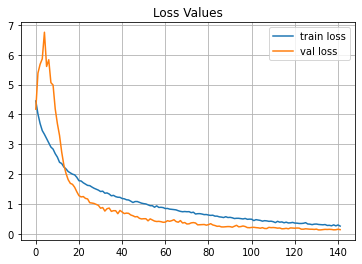

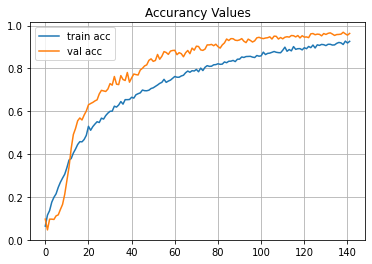

In [44]:
from matplotlib import figure
import matplotlib.pyplot as plt

# Plot the loss

plt.title('Loss Values')
y1 = plt.plot(history.history['loss'], label='train loss')
y2 = plt.plot(history.history['val_loss'], label='val loss')
plt.grid()
plt.legend(['train loss','val loss'])
plt.savefig('LossValues_loss')
plt.show()

# Plot the accuracy

plt.title('Accurancy Values')
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.grid()
plt.legend(['train acc','val acc'])
plt.savefig('AccVal_acc')
plt.show()


#### Pre-trained architectural model:

In [ ]:
# Load the VGG model

from keras.applications import vgg16

vgg_conv = vgg16.VGG16(
weights='imagenet', 
include_top=False, 
input_shape=(256, 256, 3))

In [ ]:
# Freeze the layers except the last 4 layers

for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers

for layer in vgg_conv.layers:
    print(layer, layer.trainable)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

In [ ]:
# Compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(
train_generator,
validation_data = validation_generator,
steps_per_epoch = train_generator.samples/train_generator.batch_size,
validation_steps = validation_generator.samples/validation_generator.batch_size,
epochs = 150,
verbose = 1,
callbacks = callbacks
)

In [ ]:
# Save the model
model.save('small_last4.h5')